In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../data/filling_machine_ilapak12.csv", delimiter=";")
# df["timestamp"] = pd.to_datetime(df["created_date"] + " " + df["created_time"])
df.drop(columns=["id"], inplace=True)
df.set_index("times", inplace=True)

sealing_cols = ["Suhu Sealing Vertikal Bawah (oC)", "Suhu Sealing Vertical Atas (oC)", "Suhu Sealing Horizontal Depan/Kanan (oC)", "Suhu Sealing Horizontal Belakang/Kiri (oC)"]
prod_cols = ["Speed(rpm)", "Availability(%)", "Performance(%)", "Quality(%)", "OEE(%)"]

df[sealing_cols] = df[sealing_cols].apply(lambda x : x.str.replace(",", ".").astype(float))
df[prod_cols] = df[prod_cols].apply(lambda x : x.str.replace("%", ""))
df[prod_cols] = df[prod_cols].apply(lambda x : x.str.replace(",", ".").astype(float))

# times columns to second
times_col = ["Downtime (hh:mm:ss)", "Output Time (hh:mm:ss)", "Total Time (hh:mm:ss)"]
def to_seconds(x):
    hh, mm, ss = map(int, x.split(':'))
    return (hh * 3600) + (mm * 60) + ss

df[times_col] = df[times_col].apply(lambda x : x.apply(to_seconds))

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20771 entries, 2023-08-01 05:42:34 to 2023-11-24 14:01:39
Data columns (total 22 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Shift                                       20771 non-null  int64  
 1   Status                                      20771 non-null  int64  
 2   Suhu Sealing Vertikal Bawah (oC)            20771 non-null  float64
 3   Suhu Sealing Vertical Atas (oC)             20771 non-null  float64
 4   Suhu Sealing Horizontal Depan/Kanan (oC)    20771 non-null  float64
 5   Suhu Sealing Horizontal Belakang/Kiri (oC)  20771 non-null  float64
 6   Counter Output (pack)                       20771 non-null  int64  
 7   Counter Reject (pack)                       20771 non-null  int64  
 8   Speed(rpm)                                  20771 non-null  float64
 9   Availability(%)                             20771 non-nu

In [3]:
df

,Shift,Status,Suhu Sealing Vertikal Bawah (oC),Suhu Sealing Vertical Atas (oC),Suhu Sealing Horizontal Depan/Kanan (oC),Suhu Sealing Horizontal Belakang/Kiri (oC),Counter Output (pack),Counter Reject (pack),Speed(rpm),Availability(%),...,OEE(%),Jaws Position,Knife Position,Pump Position Stop,Doser Drive Enable,Sealing Enable,Machine Alarm,Downtime (hh:mm:ss),Output Time (hh:mm:ss),Total Time (hh:mm:ss)
times,,,,,,,,,,,,,,,,,,,,,
2023-08-01 05:42:34,0,0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
2023-08-01 05:42:34,0,0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
2023-08-01 05:42:53,0,0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
2023-08-01 05:43:10,3,1,43.3,33.9,28.9,29.9,0,0,0.0,0.0,...,0.0,0,0,0,0,0,0,11,0,11
2023-08-01 05:43:53,3,1,46.8,38.2,42.3,44.1,0,0,0.0,0.0,...,0.0,0,0,0,0,0,0,54,0,54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-24 13:41:39,1,1,234.5,234.4,219.5,219.6,103404,1650,45.7,92.1,...,55.2,0,0,0,0,0,0,1189,23008,24960
2023-11-24 13:46:39,1,1,234.3,234.4,219.5,219.6,103404,1650,45.1,92.2,...,54.5,0,0,0,0,0,0,1189,23308,25260
2023-11-24 13:51:40,1,1,234.3,234.2,219.5,219.6,103404,1650,44.5,92.3,...,53.9,0,0,0,0,0,0,1189,23608,25560


# Anomaly Detection

In [4]:
from sklearn.ensemble import IsolationForest
from sklearn.inspection import DecisionBoundaryDisplay

clf = IsolationForest(max_samples=150, random_state=42)
df["pred_anomaly"] = clf.fit_predict(df)

<Axes: xlabel='pred_anomaly', ylabel='count'>

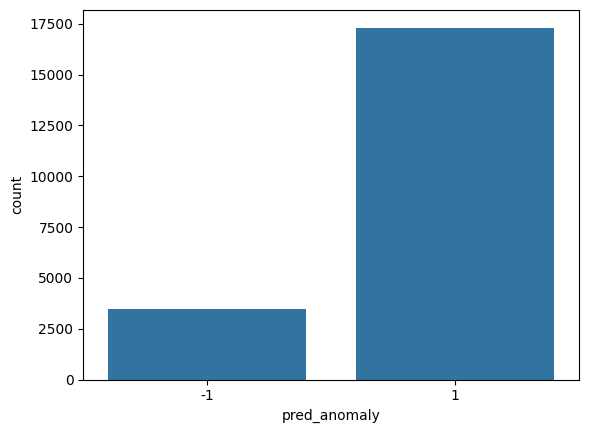

In [5]:
sns.countplot(data=df, x="pred_anomaly")

In [17]:
# anoms = df[["pred_anomaly"] == -1]
# anoms
anoms = len(df[df["pred_anomaly"] == -1]["pred_anomaly"]) / len(df)
non_anoms = len(df[df["pred_anomaly"] == 1]["pred_anomaly"]) / len(df)
anoms, non_anoms

(0.16638582639256655, 0.8336141736074334)